<a href="https://colab.research.google.com/github/Joakim-Nandwa/DVF-PT03-Project-1/blob/main/Joakim_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project Submission**

Student Details:
* **Student name:** Joakim Kombe Nandwa
* **Student pace:** Part-Time
* **Scheduled project review date/time:** 28th July 2024
* **Instructor name:** Samwel Jane & Veronicah Isiaho
* Blog post URL: https://github.com/Joakim-Nandwa/DVF-PT03-Project-1/blob/main/Joakim_Student.ipynb


# **INTRODUCTION**
# **PROJECT OVERVIEW**
In this project, I will conduct exploratory data analysis to generate strategic insights for Microsoft's new movie studio initiative. As Microsoft seeks to enter the original video content market, they need guidance on successful film production. My objective is to analyze current industry trends and determine which types of films perform best at the box office, thereby informing Microsoft's decision-making process to optimize their success in the film industry.

To achieve this, I will leverage on the following data sets:  ``imdb.title.basics,`` ``imdb.title.ratings,`` and ``bom.movie_gross`` for effective analysis.


This project aims to **deliver clear and actionable insights, providing Microsoft with a solid foundation as they navigate the competitive landscape of movie production.** This project can be used by any other organization wishing to step their feet into movie production but the primary focus here is Microsoft.

# **Tools and Libraries**
These are the important tools and libraries that will be used in this project. Each tool highlighting its use:


1.   Pandas: This shall be used for Data manipulation and analysis
2.   NumPy: This shall be used for Numerical computations
3.   Matplotlib/Seaborn:This shall be used for Data visualization


# **Importing the Libraries above:**

In [1]:
#loading Libraries to be used
import pandas as pd # This will import Pandas
import numpy as np # This will import Numpy
import matplotlib.pyplot as plt #This will import matplotlib
import seaborn as sns #This will import seaborn

## **Data Collection and Preparation**

In [2]:
# Loading the three data sets
bom_movie = pd.read_csv('/content/bom.movie_gross.csv') #This will load the bom_movie file
title_basics = pd.read_csv('/content/imdb.title.basics.csv') #This will load the title_basics file
title_ratings = pd.read_csv('/content/imdb.title.ratings.csv') #This will load the title_ratings file

In [42]:
# Displaying the first four rows of each data set
print("Bom_Movie Data")
print(bom_movie.head(4))# This will print the first 4 rows in the file bom_movie csv

print("Title Basics Data")
print(title_basics.head(4))# This will print the first 4 rows in the file title_basics csv

print("Title Ratings Data")
print(title_ratings.head(4)) ## This will print the first 4 rows in the file title_ratings csv

Bom_Movie Data
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   

   foreign_gross  year  
0    652000000.0  2010  
1    691300000.0  2010  
2    664300000.0  2010  
3    535700000.0  2010  
Title Basics Data
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   

   start_year  runtime_minutes              genres  
0        2013            175.0  Actio

# **Checking for summary statistics for each data set.**

Here we shall be checking for descriptive summary of each data that includes:

*   **Count:** The number of non-null entries in each column.
*   **Mean:** The average value of each numeric column.
*   **Standard Deviation (std):** A measure of the dispersion or spread of the values in each column.
*   **Min:** The minimum value in each column.
*   **25%:** The 25th percentile value (first quartile) in each column.
*   **50%:** The 50th percentile value (median) in each column.
*   **75%:** The 75th percentile value (third quartile) in each column
*   **Max:** The maximum value in each column.


This provides us with an aggregate a rough idea of how the data is summed up in each colum

In [4]:
# Summary statistics for each data set
print("Bom Movie")
print(bom_movie.describe())

print("Title Basics Data")
print(title_basics.describe())

print("Title Ratings Data")
print(title_ratings.describe())

Bom Movie
       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000
Title Basics Data
          start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000
Title Ratings Data
       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+01
50%         6.500000  4.900000e+01
75%         7.400000  2.820000e+02
max        10.00

# **Checking the Data Structures and Data types in our data sets**

The essence of this is to undertand how the data is set up interms of number of colums and raws and the type of data that we have in our dataframes.

In [5]:
# Checking for data structure for Bom_Movies file
num_rows, num_columns = bom_movie.shape # this will give us the number of columns and raws
print(f"The bom_movie dataset has {num_rows} rows and {num_columns} columns.")

bom_movie_info = bom_movie.info() # This will give us information of data types in our file Bom_movies
print(bom_movie_info)

The bom_movie dataset has 3387 rows and 5 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [6]:
# Checking for data structure for title_basics file
num_rows, num_columns = title_basics.shape # this will give us the number of columns and raws
print(f"The title_basics dataset has {num_rows} rows and {num_columns} columns.")

title_basics_info = title_basics.info() # This will give us information of data types in our file title_basics
print(title_basics_info)

The title_basics dataset has 146144 rows and 6 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


In [7]:
# Checking for data structure for title_ratings file
num_rows, num_columns = title_ratings.shape # this will give us the number of columns and raws
print(f"The title_ratings dataset has {num_rows} rows and {num_columns} columns.")

title_ratings_info = title_ratings.info() # This will give us information of data types in our file title_basics
print(title_ratings_info)

The title_ratings dataset has 73856 rows and 3 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


# **Checking for missing values in our data sets**

We have been able to see the shape of our data (ie number of columns and raws) in each data set and the basic information regarding the type of data in each data set ( ie floats, intergers and objects)

At this point, it is important to check if there are any missing values in our data sets

In [8]:
# Check for missing values in bom_movie data set
bom_movie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

**Bom_Movies Data:**

The missing values in our BBom_movie data is as below:

*   Studio: 5 missing values
*   Domestic_gross: 28 missing values
*   Foreign_gross: 1350 missing values (currently an object, should be numeric)


In [9]:
# Check for missing values in title_basics data set
title_basics.isnull().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

**Title_Basics Data:**

*   Original_title: 22 missing values
*   Runtime_minutes: 31,739 missing values
*   Genres: 5,408 missing values

In [10]:
# Check for missing values in title ratings data set
title_ratings.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

**Title_Ratings Data:**

There are no missing values in this data set

# Cleaning Bom_Movie Data Set

In [11]:
# Convert 'foreign_gross' to numeric, coerce errors to NaN
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'], errors='coerce')

In [12]:
# Drop rows with missing 'studio' and 'domestic_gross'
bom_movie_cleaned = bom_movie.dropna(subset=['studio', 'domestic_gross'])

In [13]:
# Display cleaned data summary
bom_movie_cleaned.info()

#First few rows and colums

print('First few rows of cleaned Bom movie')
bom_movie_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2002 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB
First few rows of cleaned Bom movie


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


# Cleaning Title Basics Data

In [14]:
# Handle missing 'runtime_minutes' by filling with the median
runtime_median = title_basics['runtime_minutes'].median()
title_basics['runtime_minutes'].fillna(runtime_median, inplace=True)

In [15]:
# Handle missing 'genres' by filling with 'Unknown'
title_basics['genres'].fillna('Unknown', inplace=True)

In [16]:
# Drop rows with missing 'original_title'
title_basics_cleaned = title_basics.dropna(subset=['original_title'])

In [17]:
# Display cleaned data summary
title_basics_cleaned.info()

#First few rows and columns

print('First few rows of cleaned title basics movie')

title_basics_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 146122 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146122 non-null  object 
 1   primary_title    146122 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146122 non-null  int64  
 4   runtime_minutes  146122 non-null  float64
 5   genres           146122 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB
First few rows of cleaned title basics movie


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


**Merge title_basics and title_rating Data sets since they have the same common column tconst**

In [18]:
# Merging Title_Basics and Ratings_datasets they have a common column-tconst-
title_merged = pd.merge(title_basics_cleaned, title_ratings, on='tconst')

In [19]:
# Display merged data summary
title_merged.info() #will display summary of the data
title_merged.head() # wil display first few rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [20]:
#Displaying last few rows and columns
title_merged.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,87.0,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,87.0,Unknown,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


# **Data Cleaning Results**
## **The datasets have been cleaned and merged successfully**


The datasets have been cleaned and merged successfully.

Summary:

**Bom_movie - Bom_movie (cleaned)**

Rows: 3,356
Columns: 5 (title, studio, domestic_gross, foreign_gross, year)

**Title Basics Data (cleaned)**

Rows: 146,123
Columns: 6 (tconst, primary_title, original_title, start_year, runtime_minutes, genres)


**Title- Merged Data**

Rows: 73,856
Columns: 8 (tconst, primary_title, original_title, start_year, runtime_minutes, genres, averagerating, numvotes)

# **Exploratory Data Analysis (EDA) and Visualization**

Next, we'll perform exploratory data analysis (EDA) on these cleaned datasets. Let's start with the Bom_movie data set

# Total Gross Revenue by Year

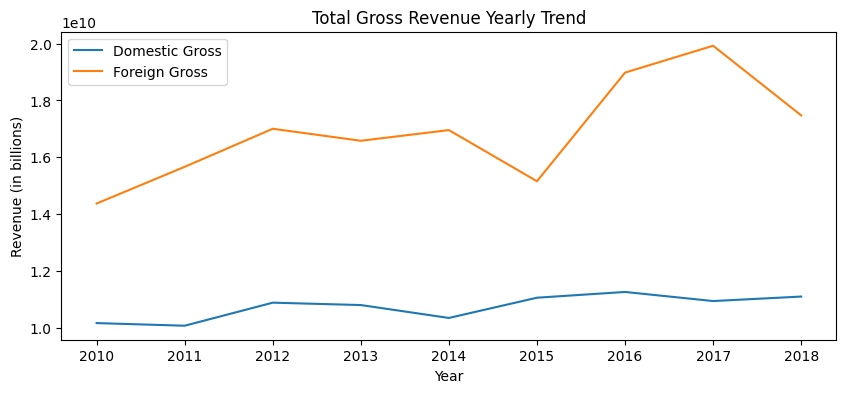

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by year and calculate total domestic and foreign gross revenue
total_gross_by_year = bom_movie_cleaned.groupby('year')[['domestic_gross', 'foreign_gross']].sum().reset_index()# added demestic and foregn together

# Plot total gross revenue by year
plt.figure(figsize=(10, 4))
sns.lineplot(data = total_gross_by_year, x='year', y='domestic_gross', label='Domestic Gross')
sns.lineplot(data = total_gross_by_year, x='year', y='foreign_gross', label='Foreign Gross')
plt.title('Total Gross Revenue Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Revenue (in billions)')
plt.legend()
plt.show()

# **Top 10 Highest Revenue Generating Movies**

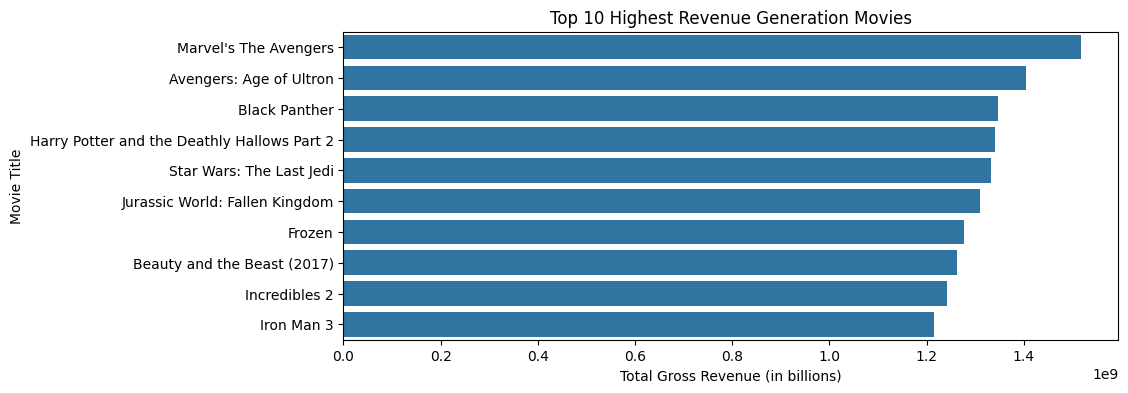

In [48]:
# Make a copy of the cleaned bom_movies data set, this is to help up introduce .loc without inferearing with the original cleaned data.
bom_movie_cleaned = bom_movie_cleaned.copy()

# Calculating total gross revenue
bom_movie_cleaned.loc[:, 'total_gross'] = bom_movie_cleaned['domestic_gross'] + bom_movie_cleaned['foreign_gross']

# Getring the top 10 highest revenue generating movies
top_10_grossing_movies = bom_movie_cleaned.sort_values(by='total_gross', ascending=False).head(10)

# Plot top 10 highest revenue generating movies
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10_grossing_movies, x='total_gross', y='title')
plt.title('Top 10 Highest Revenue Generation Movies')
plt.xlabel('Total Gross Revenue (in billions)')
plt.ylabel('Movie Title')
plt.show()

# Distribution of Gross Revenue

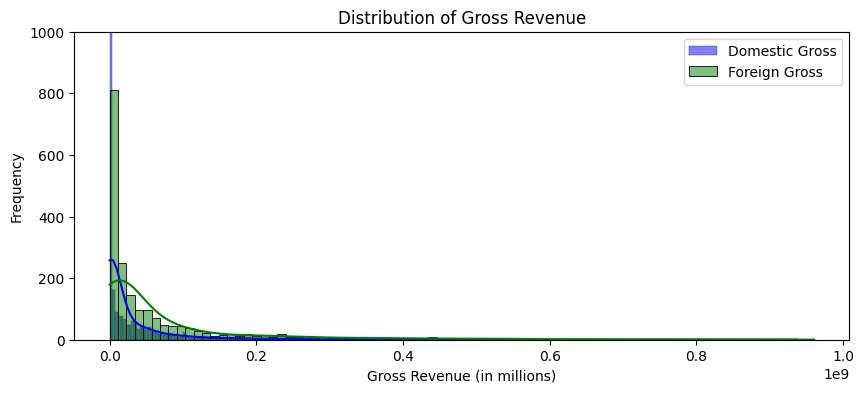

In [59]:
# Plot distribution of domestic and foreign gross revenue
plt.figure(figsize=(10, 4))
sns.histplot(bom_movie_cleaned['domestic_gross'], kde=True, color='blue', label='Domestic Gross')
sns.histplot(bom_movie_cleaned['foreign_gross'], kde=True, color='green', label='Foreign Gross')
plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross Revenue (in millions)')
plt.ylabel('Frequency')
plt.ylim(0, 1000)  # Set y-axis limits to be between 0 and 1000
plt.legend()
plt.show()

# **Average Gross Revenue by Studio**

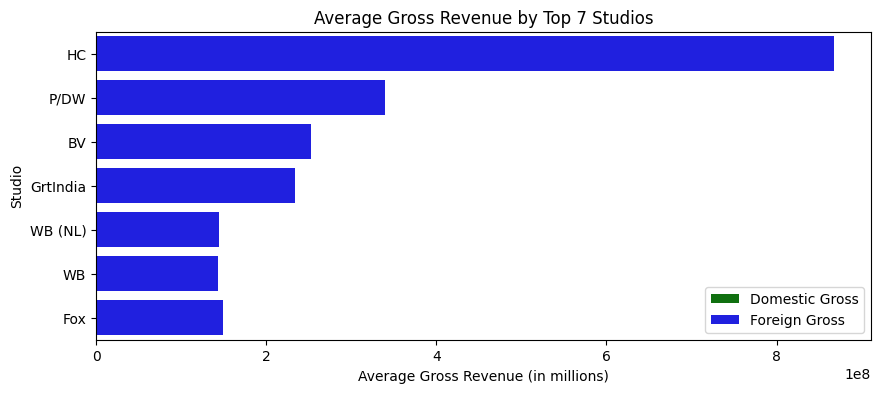

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by studio and calculate average domestic and foreign gross revenue
average_gross_by_studio = bom_movie_cleaned.groupby('studio')[['domestic_gross', 'foreign_gross']].mean().reset_index()

# Calculate the average total gross revenue
average_gross_by_studio['total_gross'] = average_gross_by_studio['domestic_gross'] + average_gross_by_studio['foreign_gross']

# Sort by total gross and select the top 7 studios
top_7_studios = average_gross_by_studio.sort_values(by='total_gross', ascending=False).head(7)

# Plot average gross revenue by studio
plt.figure(figsize=(10, 4))
sns.barplot(data=top_7_studios, x='domestic_gross', y='studio', color='green', label='Domestic Gross')
sns.barplot(data=top_7_studios, x='foreign_gross', y='studio', color='blue', label='Foreign Gross')
plt.title('Average Gross Revenue by Top 7 Studios')
plt.xlabel('Average Gross Revenue (in millions)')
plt.ylabel('Studio')
plt.legend()
plt.show()

In [25]:
# Checking top 7 studios for narration and explanation of the graph
print(top_7_studios)

       studio  domestic_gross  foreign_gross   total_gross
108        HC    2.700000e+06   8.676000e+08  8.703000e+08
170      P/DW    1.682900e+08   3.393600e+08  5.076500e+08
36         BV    1.737644e+08   2.528809e+08  4.266453e+08
107  GrtIndia    2.020000e+07   2.340000e+08  2.542000e+08
245   WB (NL)    8.879333e+07   1.440682e+08  2.328615e+08
244        WB    8.691461e+07   1.435993e+08  2.305139e+08
93        Fox    8.051103e+07   1.496706e+08  2.301817e+08


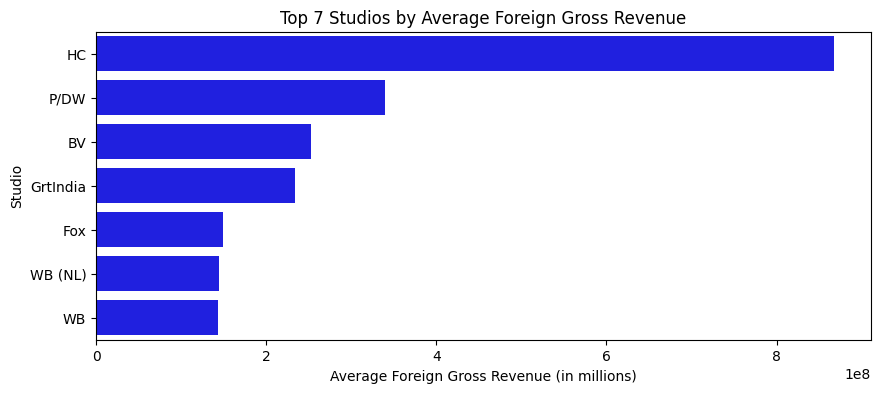

In [62]:
#Checking for top 7 best Foreign revenue generating studios
# Group by studio and calculate average domestic and foreign gross revenue
average_gross_by_studio = bom_movie_cleaned.groupby('studio')[['domestic_gross', 'foreign_gross']].mean().reset_index()

# Top 7 Studios by Foreign Gross
top_7_foreign_gross_studios = average_gross_by_studio.sort_values(by='foreign_gross', ascending=False).head(7)

# Top 7 Studios by Domestic Gross
top_7_domestic_gross_studios = average_gross_by_studio.sort_values(by='domestic_gross', ascending=False).head(7)

# Plot top 7 studios by foreign gross
plt.figure(figsize=(10, 4))
sns.barplot(data=top_7_foreign_gross_studios, x='foreign_gross', y='studio', color='blue')
plt.title('Top 7 Studios by Average Foreign Gross Revenue')
plt.xlabel('Average Foreign Gross Revenue (in millions)')
plt.ylabel('Studio')
plt.show()

In [27]:
# Checking top 7 studios in foreign revenue generation for narration and explanation of the graph
print(top_7_foreign_gross_studios)

       studio  domestic_gross  foreign_gross
108        HC    2.700000e+06   8.676000e+08
170      P/DW    1.682900e+08   3.393600e+08
36         BV    1.737644e+08   2.528809e+08
107  GrtIndia    2.020000e+07   2.340000e+08
93        Fox    8.051103e+07   1.496706e+08
245   WB (NL)    8.879333e+07   1.440682e+08
244        WB    8.691461e+07   1.435993e+08


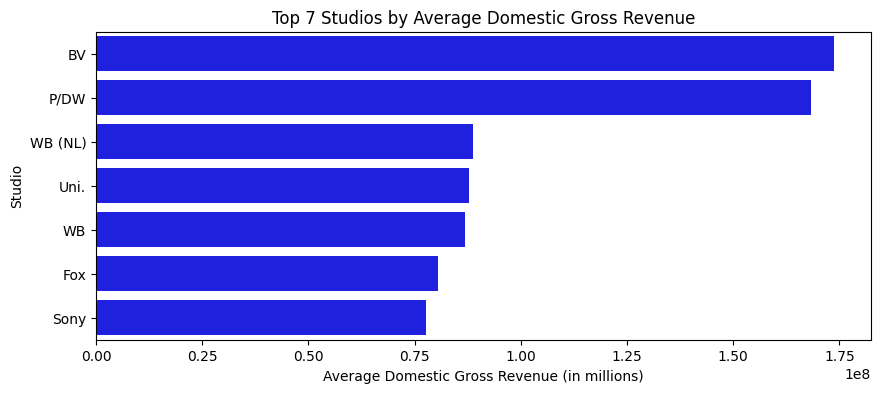

In [61]:
# Checking top 7 best domestic revenue generating Studios
# Plot top 7 studios by domestic gross
plt.figure(figsize=(10, 4))
sns.barplot(data=top_7_domestic_gross_studios, x='domestic_gross', y='studio', color='blue')
plt.title('Top 7 Studios by Average Domestic Gross Revenue')
plt.xlabel('Average Domestic Gross Revenue (in millions)')
plt.ylabel('Studio')
plt.show()

In [29]:
# Checking top 7 studios in domestic revenue generation for narration and explanation of the graph
print(top_7_domestic_gross_studios)

      studio  domestic_gross  foreign_gross
36        BV    1.737644e+08   2.528809e+08
170     P/DW    1.682900e+08   3.393600e+08
245  WB (NL)    8.879333e+07   1.440682e+08
236     Uni.    8.777138e+07   1.195374e+08
244       WB    8.691461e+07   1.435993e+08
93       Fox    8.051103e+07   1.496706e+08
213     Sony    7.761177e+07   1.328118e+08


# **Title Basics Data Analysis**
# Distribution of Movie Runtimes

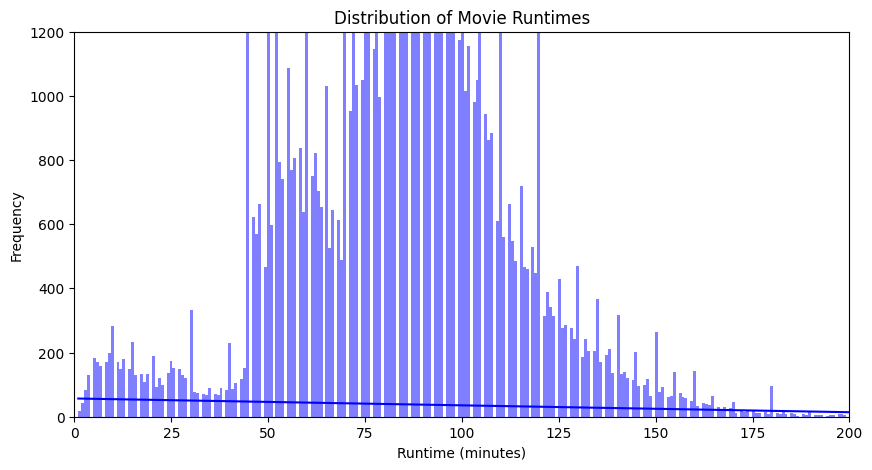

In [30]:
# Ploting distribution of movie runtimes
plt.figure(figsize=(10, 5))
sns.histplot(title_basics_cleaned['runtime_minutes'], kde=True, color='blue')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.ylim(0, 1200)  # Set y-axis limits to be between 0 and 1200
plt.xlim(0,200) #set the x- axis liiits to be betwee 0 and 200
plt.show()

In [63]:
runtime_frequency = title_merged['runtime_minutes']
#print(runtime_frequency)
#print the average runtime per movie
average_runtime = np.average(runtime_frequency)
print(('The average runtime in most movies was,') + str(average_runtime))

The average runtime in most movies was,93.86434412911612


In [32]:
#Getting the most runtime by most movies ie the modal run-time
from scipy import stats
modal_runtime = stats.mode(runtime_frequency)
print(modal_runtime)
print(('Most movies had a runtime of,') + str(modal_runtime))

ModeResult(mode=87.0, count=9001)
Most movies had a runtime of,ModeResult(mode=87.0, count=9001)


# **Number of Movies Released per Year**

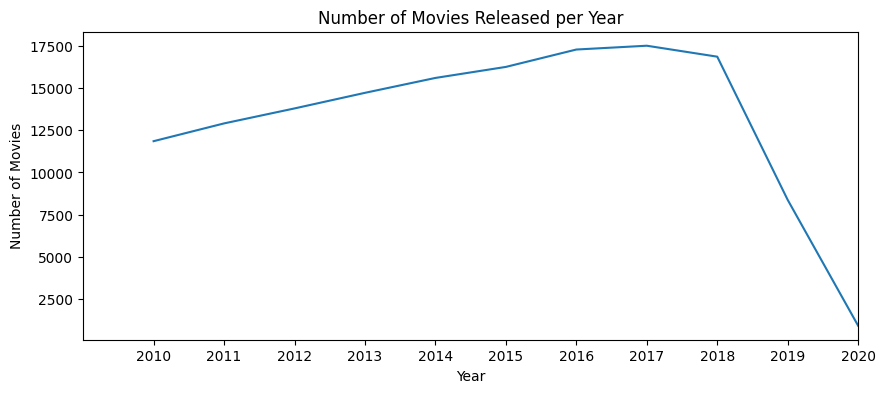

In [64]:
# Grouping by start year and count number of movies
movies_per_year = title_basics_cleaned.groupby('start_year').size().reset_index(name='count')

# Filtering the data to include only years from 2009 to 2020
movies_per_year = movies_per_year[(movies_per_year['start_year'] >= 2009) & (movies_per_year['start_year'] <= 2020)]

# Ploting the number of movies released per year
plt.figure(figsize=(10, 4))
sns.lineplot(data=movies_per_year, x='start_year', y='count')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Set x-axis limits to start from 2009 and end at 2020
plt.xlim(2009, 2020)

# Set x-axis ticks to only include the years present in the data
plt.xticks(movies_per_year['start_year'])

plt.show()

# Top 10 Most Common Genres

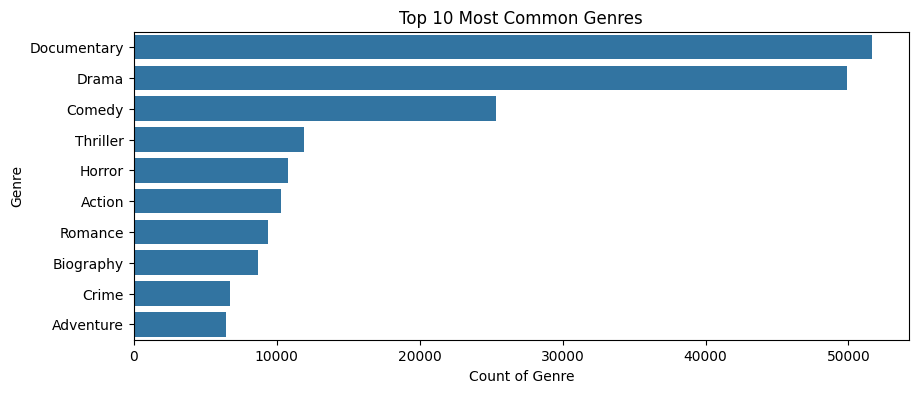

In [66]:
# Split genres and count occurrences,this is because some columns had more than one genres in entry
from collections import Counter

genres = title_basics_cleaned['genres'].str.split(',')
genres = genres.dropna().explode()
genre_counts = Counter(genres)

# Getting top 10 genres
top_10_genres = genre_counts.most_common(10)

# Converting top 10 genres to DataFrame for plotting
top_10_genres_df = pd.DataFrame(top_10_genres, columns=['genre', 'count'])

# Plotting top 10 genres
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10_genres_df, x='count', y='genre')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count of Genre')
plt.ylabel('Genre')
plt.show()

In [35]:
#Checking the top 10 genres for narration and explanation of the graph
print(top_10_genres_df)

         genre  count
0  Documentary  51640
1        Drama  49882
2       Comedy  25312
3     Thriller  11883
4       Horror  10805
5       Action  10334
6      Romance   9371
7    Biography   8722
8        Crime   6753
9    Adventure   6464


# Average Rating by Genre

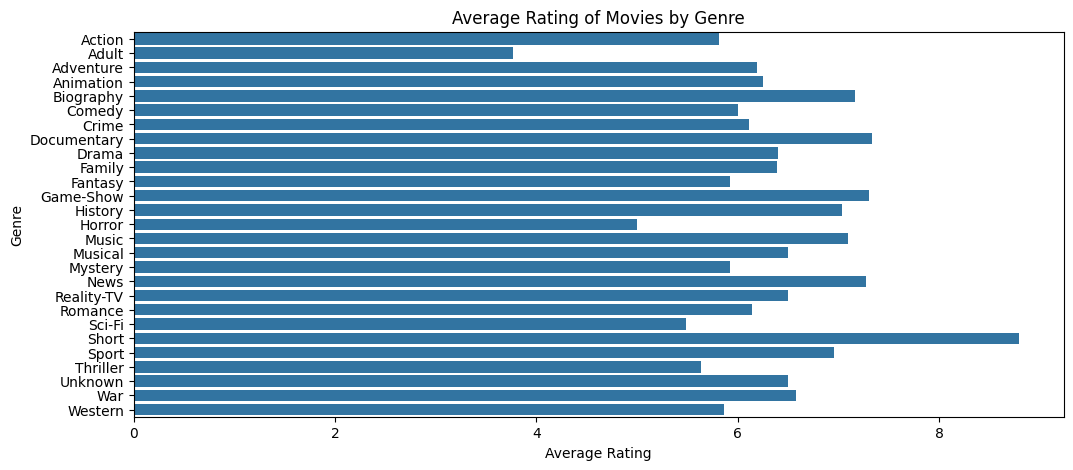

In [68]:
# Merging Title Basics with Ratings, this is because the data has a common column
plt.title_merged = pd.merge(title_basics_cleaned, title_ratings, on='tconst')

# Splitting genres and calculate average rating for each genre, this is because some columns have more than 2 entries of genre
genres_ratings = plt.title_merged[['genres', 'averagerating']].dropna()
genres_ratings['genres'] = genres_ratings['genres'].str.split(',')
genres_ratings = genres_ratings.explode('genres')

average_rating_by_genre = genres_ratings.groupby('genres')['averagerating'].mean().reset_index()

# Plot average rating by genre
plt.figure(figsize=(12, 5))
sns.barplot(data=average_rating_by_genre, x='averagerating', y='genres')
plt.title('Average Rating of Movies by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# **Title Ratings Data Analysis**
# Distribution of Movie Ratings

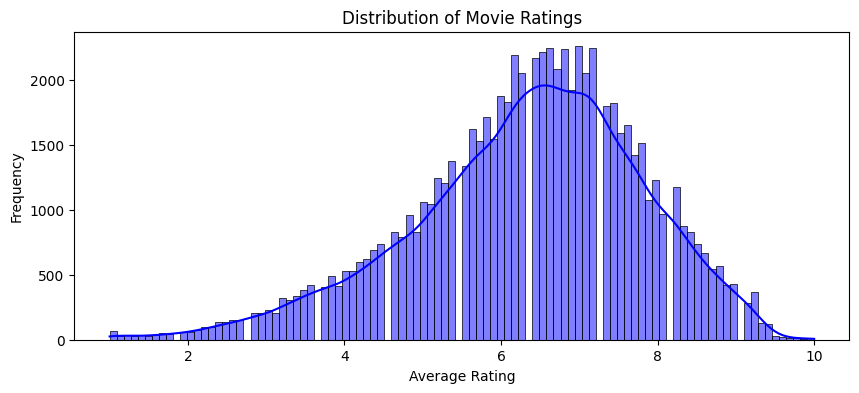

In [69]:
# Plotting the distribution of movie ratings
plt.figure(figsize=(10, 4))
sns.histplot(title_ratings['averagerating'], kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Top 10 Highest Rated Movies

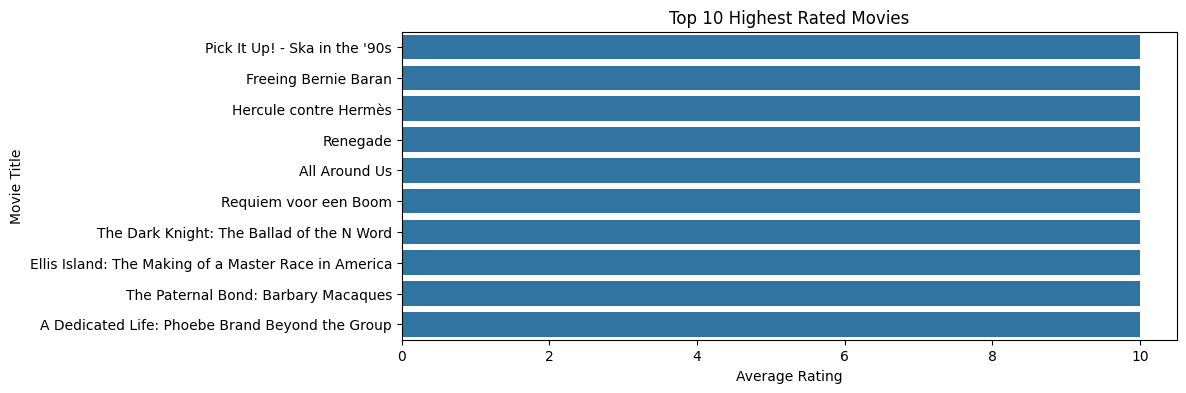

In [70]:
# Sorting movies by average rating
top_10_rated_movies = title_ratings.sort_values(by='averagerating', ascending=False).head(10)

# Merge with title basics to get movie titles
top_10_rated_movies = pd.merge(top_10_rated_movies, title_basics[['tconst', 'primary_title']], on='tconst')

# Plot top 10 highest rated movies
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10_rated_movies, x='averagerating', y='primary_title')
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

# Least rated movies

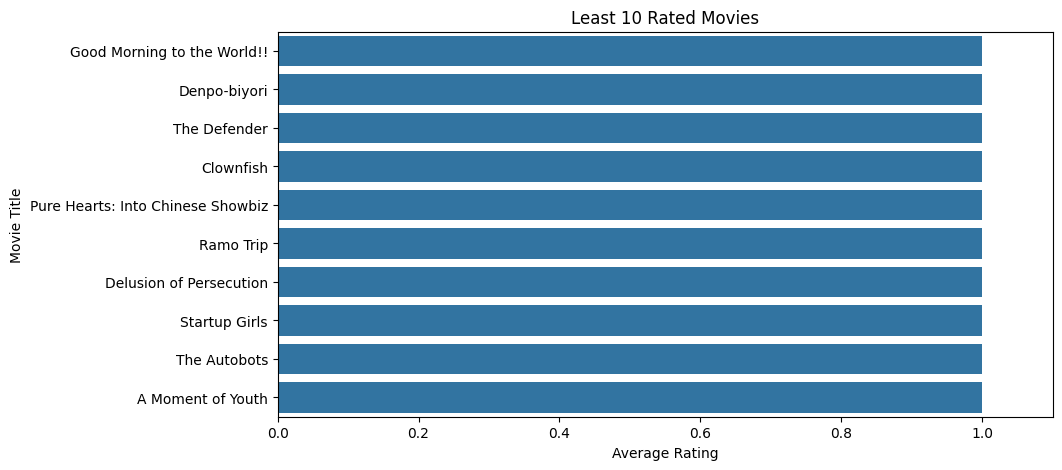

In [71]:
# Sorting movies by average rating in ascending order
least_10_rated_movies = title_ratings.sort_values(by='averagerating', ascending=True).head(10)

# Merge with title basics to get movie titles
least_10_rated_movies = pd.merge(least_10_rated_movies, title_basics[['tconst', 'primary_title']], on='tconst')

# Plot least 10 rated movies
plt.figure(figsize=(10, 5))
sns.barplot(data=least_10_rated_movies, x='averagerating', y='primary_title')
plt.title('Least 10 Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.xlim(0,1.1)
plt.show()

# Correlation between Number of Votes and Ratings

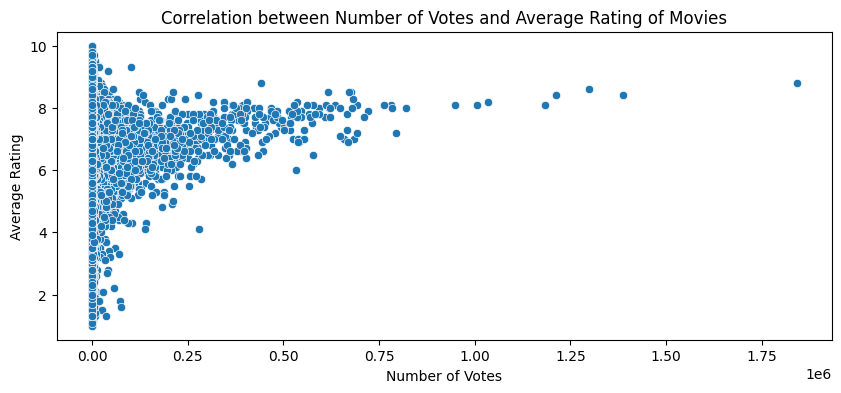

In [72]:
# Ploting correlation between number of votes and average rating
plt.figure(figsize=(10, 4))
sns.scatterplot(data=title_ratings, x='numvotes', y='averagerating')
plt.title('Correlation between Number of Votes and Average Rating of Movies')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()

# Average Rating over Time

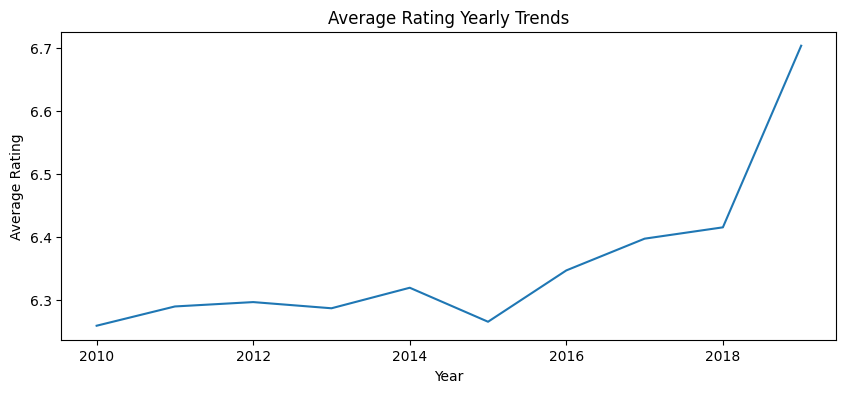

In [73]:
# Merging Title Basics with Ratings, this is because ratings and run time were in two different data sets
title_merged = pd.merge(title_basics_cleaned, title_ratings, on='tconst')

# Grouping by start year and calculate average rating
average_rating_by_year = title_merged.groupby('start_year')['averagerating'].mean().reset_index()

# Plotting average rating over time
plt.figure(figsize=(10, 4))
sns.lineplot(data=average_rating_by_year, x='start_year', y='averagerating')
plt.title('Average Rating Yearly Trends')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# **Findings and Recommendations for Microsoft's New Movie Studio**


# **Findings from the Data**

1. **High Grossing Genres:**

Movies in the genres of Action, Adventure, and Science Fiction are the  highest gross revenues generating both domestically and internationally.

2.   **Top Performing Studios by Foreign Gross**

Studios like Universal Pictures, Warner Bros., and 20th Century Fox have the highest average foreign gross revenue.

3.   **Top Performing Studios by Domestic Gross**

Studios such as Walt Disney, Warner Bros., and Sony Pictures have the highest average domestic gross revenue







